# Lab 4: CSS 100

In this lab, you'll get hands-on practice using **regularization** techniques and understanding how regularization works.

This will include:

- Fitting Lasso/Ridge models using various `alpha` ($\lambda$) values.  
- Interpreting the *impact* of $\lambda$ on the size of coefficients and model performance.  

The goal is that you will walk away with a deeper understanding of how regularization actually works under the hood.

In [89]:
### Make sure to run this code!
import nltk
import pandas as pd
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import StandardScaler

In [90]:
### Make sure to run this code
df = pd.read_csv("data/housing.csv")
df = df.dropna()

## Part 1: Conceptual background

In this section, we'll walk through the equations for Lasso and Ridge regression and try to understand the impact of particular values of $\beta$ on the *cost* for a simplified scenario.

Specifically, we'll look at what happens when $n = p = 1$, i.e., we have just one data point and just one predictor. This will help us build intuition. 

### Q1: Understanding the cost function for Ridge

Assuming $n = p = $, the cost function for ridge regression simplifies to:

$C_{ridge} = (y - \beta)^2 + \lambda*\beta^2$ 

Assuming $y = 2$ and $\lambda = 0$, create a **visualization** of how $C_{ridge}$ varies across coefficients ranging from $[-5, 5]$. 


In [110]:
### Set up betas
betas = np.linspace(-5, 5, 101)

Text(0, 0.5, 'Cost')

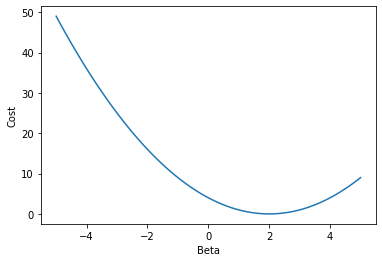

In [111]:
### BEGIN SOLUTION
y = 2
cost = (y - betas)**2
plt.plot(betas, cost)
plt.xlabel("Beta")
plt.ylabel("Cost")
### END SOLUTION

### Q2: What's the optimal $\beta$?

Given the cost function above, what is the optimal value of $\beta$? That is, which value of $\beta$ **minimizes** the cost function?

Hint: use the `argmin` function on your *cost* array to figure out the index of the lowest cost, then use that to figure out which `beta` was best.

In [112]:
### BEGIN SOLUTION
best_beta = betas[cost.argmin()]
### END SOLUTION

In [113]:
assert best_beta
assert best_beta == 2

### Q3: Tuning $\lambda$

Now, calculate the cost function for several different values of $\lambda$. Try $\lambda = 1$, $\lambda = 5$, and $\lambda = 10$. Create a visualization of the cost function for each value, ideally on the same plot with the curve labeled for the appropriate $\lambda$ value.

Again, recall the cost function:

$C_{ridge} = (y - \beta)^2 + \lambda*\beta^2$ 

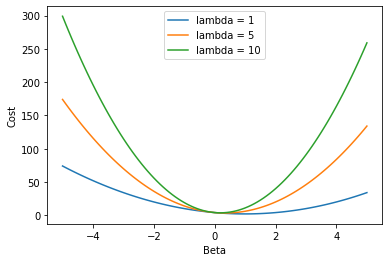

In [118]:
### BEGIN SOLUTION
y = 2
cost_l1 = (y - betas)**2 + 1 * betas**2
cost_l5 = (y - betas)**2 + 5 * betas**2
cost_l10 = (y - betas)**2 + 10 * betas**2

plt.plot(betas, cost_l1, label = "lambda = 1")
plt.plot(betas, cost_l5, label = "lambda = 5")
plt.plot(betas, cost_l10, label = "lambda = 10")
plt.xlabel("Beta")
plt.ylabel("Cost")
plt.legend()
### END SOLUTION

### Q4: Interpreting the effect of $\lambda$

As $\lambda$ increases, what happens to the value of $\beta$ that *minimizes* this cost function?

- A) It increases.
- B) It decreases. 
- C) There is no effect.

Set your answer to `ans4`.

In [96]:
### BEGIN SOLUTION
ans4 = "B"
### END SOLUTION

In [97]:
### At least one hidden test
assert ans4
### BEGIN HIDDEN TESTS
assert ans4 == "B"
### END HIDDEN TESTS

### Q5: Now, compare to $L_1$ penalty

Recall that **Lasso** uses the $L_1$ cost function: 

$C_{lasso} = (y - \beta)^2 + \lambda*|\beta|$ 

Recreate the graph you created in Q3, with the same lambda values and same beta values, but using the **Lasso** cost function instead.

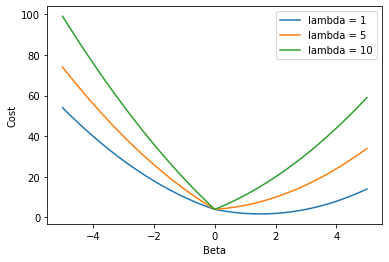

In [119]:
### BEGIN SOLUTION
y = 2
cost_l1 = (y - betas)**2 + 1 * abs(betas)
cost_l5 = (y - betas)**2 + 5 * abs(betas)
cost_l10 = (y - betas)**2 + 10 * abs(betas)

plt.plot(betas, cost_l1, label = "lambda = 1")
plt.plot(betas, cost_l5, label = "lambda = 5")
plt.plot(betas, cost_l10, label = "lambda = 10")
plt.xlabel("Beta")
plt.ylabel("Cost")
plt.legend()

### END SOLUTION

### Q6: $\lambda$ and flexibility

As $\lambda$ increases, would you say that the model becomes:

- A) More flexible.  
- B) Less flexible. 
- C) Equally flexible.

Store your answer to `ans6`.

In [99]:
### BEGIN SOLUTION
ans6 = "B"
### END SOLUTION

In [100]:
### At least one hidden test
assert ans6
### BEGIN HIDDEN TESTS
assert ans6 == "B"
### END HIDDEN TESTS


## Part 2: Using `sklearn` for regularization

In this part of the lab, you'll use the `sklearn` library to implement `Lasso` and `Ridge` regularization on an actual dataset.

### Q7: Fit a `Lasso` model

In this step, fit a `Lasso` model to our *scaled features* (`X_scaled` below) and our dependent variable (`y_scaled`) below. Use an `alpha = .01`.

Then, calculate the following variables:

- `num_zero`: the number of coefficients from the model with a value of exactly zero.  
- `avg_abs_value`: the average *absolute value* of coefficients from the model.

Note: you can access the coefficient sfrom the fit `Lasso` model using `model.coef_`.

In [101]:
### Setting up X and y
X = df[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income']].values
y = df['median_house_value'].values

### Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.reshape(-1, 1))

In [102]:
### BEGIN SOLUTION
lasso = Lasso(alpha=.01)
lasso.fit(X_scaled, y_scaled)
num_zero = len([i for i in lasso.coef_ if i == 0])
avg_abs_value = abs(lasso.coef_).mean()
### END SOLUTION

In [103]:
### At least one hidden test
assert avg_abs_value
assert num_zero

### BEGIN HIDDEN TESTS
assert num_zero == 1
assert round(avg_abs_value, 2) == 0.34
### END HIDDEN TESTS

### Q8: The effect of `alpha`.

Now, consider the range of `alpha` values below in `alphas`. For each `alpha`:

- Fit a `Lasso` model.  
- Calculate `num_zero`.  
- Calculate `avg_abs_value`. 

Then, create a `DataFrame` with these results called `df_results` with three columns: `alpha`, `num_zero`, and `avg_abs_value`. 

**Note**: This might take a little while to run.

In [104]:
alphas = np.linspace(.01, .5, 20)

In [105]:
### BEGIN SOLUTION
results = []
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_scaled, y_scaled)
    num_zero = len([i for i in lasso.coef_ if i == 0])
    avg_abs_value = abs(lasso.coef_).mean()
    results.append({
        'num_zero': num_zero,
        'avg_abs_value': avg_abs_value,
        'alpha': alpha
    })
df_results = pd.DataFrame(results)
### END SOLUTION

In [106]:
assert 'num_zero' in df_results.columns
assert 'avg_abs_value' in df_results.columns
assert 'alpha' in df_results.columns

### Q8: How does `alpha` affect `num_zero`?

Now, create a **visualization** looking at the relationship between `alpha` and `num_zero`. What do you notice?

<AxesSubplot:xlabel='alpha', ylabel='num_zero'>

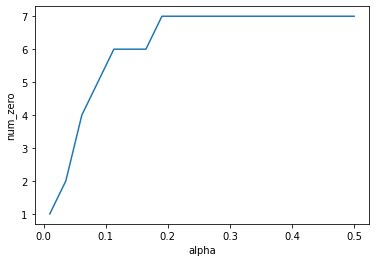

In [107]:
### BEGIN SOLUTION
sns.lineplot(data = df_results, x = "alpha", y = "num_zero")
### END SOLUTION

### Q9: How does `alpha` affect `avg_abs_value`?

Now, create a **visualization** looking at the relationship between `alpha` and `avg_abs_value`. What do you notice?

<AxesSubplot:xlabel='alpha', ylabel='avg_abs_value'>

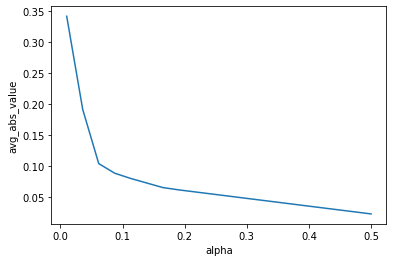

In [108]:
### BEGIN SOLUTION
sns.lineplot(data = df_results, x = "alpha", y = "avg_abs_value")
### END SOLUTION

# Submit!

Nice work! Don't forget to *validate* and *submit* your work.